# ADS - Network analysis module, homework 1

In [2]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

## Problem 1 (20% of credit) 
Visualize the network with node labels and sizes proportional to node degree

/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


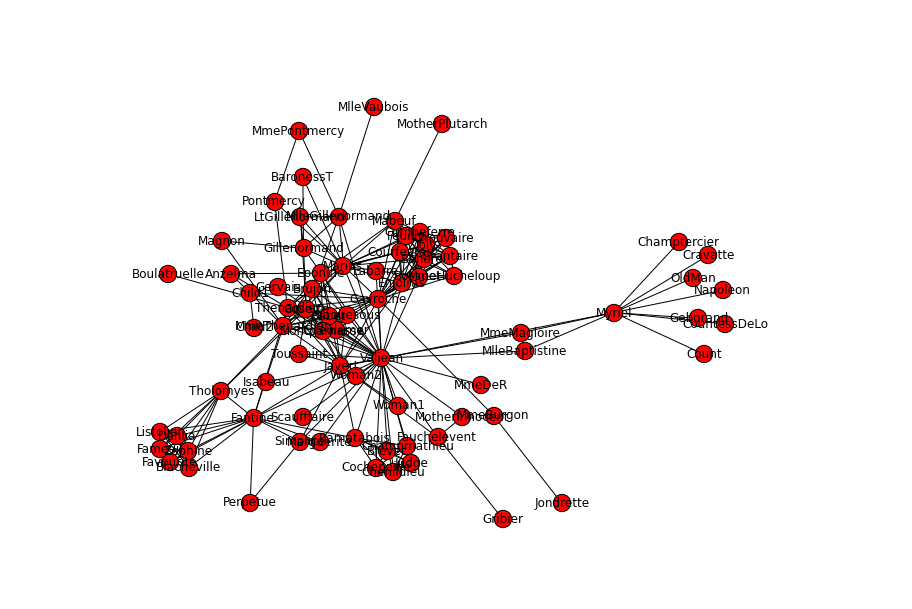

In [4]:
plt.figure(figsize = (12,8))
np.random.seed(1335) 
nx.draw(G,with_labels=True)

In [5]:
G

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [6]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

## a) degree centrality

In [7]:
c1= nx.degree(G)
topdict(c1,5)

1|Valjean:36
2|Gavroche:22
3|Marius:19
4|Javert:17
5|Thenardier:16


## b) eigenvector centrality

In [8]:
c2= nx.eigenvector_centrality(G)
topdict(c2,5)

1|Gavroche:0.31783957195
2|Valjean:0.267615018
3|Enjolras:0.267179944486
4|Marius:0.259111666033
5|Bossuet:0.242132519653


##c) betweenness centrality;

In [9]:
FCG=list(nx.connected_component_subgraphs(G, copy=True))[0]
c3 = nx.current_flow_betweenness_centrality(FCG)
topdict(c3,5)

1|Valjean:0.586325850171
2|Gavroche:0.223680322214
3|Marius:0.207934294093
4|Fantine:0.197557811233
5|Myriel:0.188684210526


## d) closeness centrality

In [10]:
c4 = nx.closeness_centrality(FCG)
topdict(c4,5)

1|Valjean:0.64406779661
2|Marius:0.531468531469
3|Javert:0.517006802721
4|Thenardier:0.517006802721
5|Gavroche:0.513513513514


## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

So for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values $\alpha=0.1-0.3$ node 55 is replaced with the node 25 in the top 5 list

In [11]:
a = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.4,0.2,0.1]
b = []
for item in a:
    c5 = nx.pagerank(G,item)
    print 'a:%s' %(item)
    topdict(c5,5)
    print '----------------'

a:0.95
1|Valjean:0.0747043161908
2|Gavroche:0.0395528871838
3|Marius:0.034302438398
4|Myriel:0.0334606288129
5|Javert:0.0323959317527
----------------
a:0.9
1|Valjean:0.0757013790394
2|Myriel:0.0396553186113
3|Gavroche:0.0373901882923
4|Marius:0.0323836576528
5|Javert:0.0313463187322
----------------
a:0.85
1|Valjean:0.0754337444533
2|Myriel:0.0428034397608
3|Gavroche:0.0357641234316
4|Marius:0.0308927019204
5|Javert:0.0303025971272
----------------
a:0.8
1|Valjean:0.0744218463133
2|Myriel:0.0443411025859
3|Gavroche:0.0343574859259
4|Marius:0.0295976432335
5|Javert:0.029264062175
----------------
a:0.7
1|Valjean:0.0709527717328
2|Myriel:0.0448978476113
3|Gavroche:0.031767940065
4|Marius:0.0272670158917
5|Javert:0.027205254098
----------------
a:0.6
1|Valjean:0.0660813647846
2|Myriel:0.0435500325678
3|Gavroche:0.0292325038599
4|Javert:0.0251726803596
5|Marius:0.0250871790501
----------------
a:0.5
1|Valjean:0.0600548187154
2|Myriel:0.0409702412016
3|Gavroche:0.0266583165639
4|Javert:0.0

## Comment:
the ranking remains mostly stable between 0.7 and 0.9

## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a lognormal distribution.

In [12]:
def rankPlot(x,fit=0,params=[]):
  #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
  #params - power-law fit cut-off
  xs=sorted(x,reverse=True) # sort the sequence in decreasing order
  plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
  plt.title("Centrality rank plot") #plot title
  #axe labels  
  plt.ylabel("Centrality")
  plt.xlabel("rank")
  fp=[]  
  if fit==1: #power law fit
      xl=np.array(xs)  
      xl=log(xl[xl>0])
      r=log(np.array(range(1,len(xl)+1)))
      data=pd.DataFrame({'x':r,'y':xl})  
      if len(params)==0:
            params=[0, Inf]
      if len(params)==1:
            params=append(params,Inf)
      lm = smf.ols(formula='y ~ x', data = data.loc[(xl>=params[0])&(xl<=params[1])]).fit()
      fp= lm.params.x
      plt.loglog(exp(data.x),exp(lm.predict(data)),'r-',marker='')                   
  if fit==2: #lognormal fit
      xl=log(x[x>0])
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=exp(mu)*stat.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
      plt.loglog(s,'r-',marker='.')
  if fit==3: #normal fit
      xl=x[x>0]
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=stat.norm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),loc=mu,scale=sigma)[::-1]
      plt.loglog(s,'r-',marker='.')      
  plt.show()
  return fp  

In [13]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
      xh=1-cumsum(xh[:-1])
      xb=xb[:-1]
      plt.ylabel("P(c>=x)")
    else:
      plt.ylabel("p(c=x)")
    plt.loglog(exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

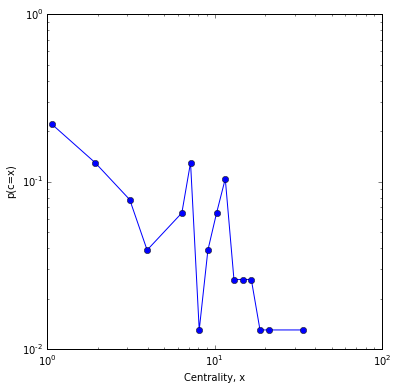

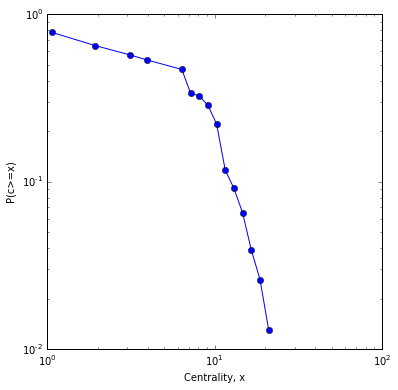

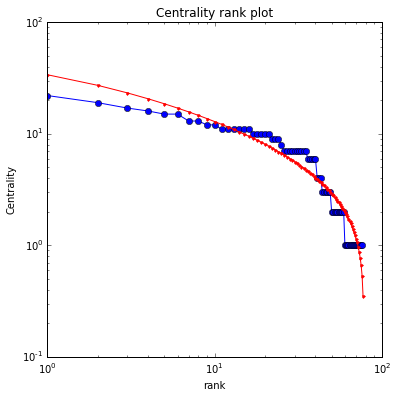

1.001930195522361

In [14]:
d=np.array(nx.degree(G).values())
plt.figure(figsize = (6,6))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (6,6))
distribution(d,cdf=1 ,params=30)
plt.figure(figsize = (6,6))
rankPlot(d,2)